In [56]:
###··· TURBINE DATASET ···### 
# Part 1: Selecting and analyzing the dataset
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


#Load the dataset
synthetic_dataset = pd.read_csv("A1-synthetic.txt", sep='\t', header=0)
x = synthetic_dataset.drop(columns=['#v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9']) 
y = synthetic_dataset[['z']]
#Scale the data
scaler = StandardScaler()
x = scaler.fit_transform(x)
y = scaler.fit_transform(y)

#Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)


Epoch 1/100
25/25 [==============================] - 2s 18ms/step - loss: 0.5190 - mae: 0.5466 - val_loss: 0.0690 - val_mae: 0.2306
Epoch 2/100
25/25 [==============================] - 0s 6ms/step - loss: 0.0353 - mae: 0.1481 - val_loss: 0.0164 - val_mae: 0.1101
Epoch 3/100
25/25 [==============================] - 0s 7ms/step - loss: 0.0074 - mae: 0.0707 - val_loss: 0.0038 - val_mae: 0.0532
Epoch 4/100
25/25 [==============================] - 0s 7ms/step - loss: 0.0018 - mae: 0.0338 - val_loss: 0.0012 - val_mae: 0.0267
Epoch 5/100
25/25 [==============================] - 0s 7ms/step - loss: 5.1761e-04 - mae: 0.0171 - val_loss: 3.5981e-04 - val_mae: 0.0128
Epoch 6/100
25/25 [==============================] - 0s 6ms/step - loss: 1.7873e-04 - mae: 0.0084 - val_loss: 1.7857e-04 - val_mae: 0.0075
Epoch 7/100
25/25 [==============================] - 0s 7ms/step - loss: 9.9325e-05 - mae: 0.0054 - val_loss: 1.2209e-04 - val_mae: 0.0055
Epoch 8/100
25/25 [==============================] - 0s 10

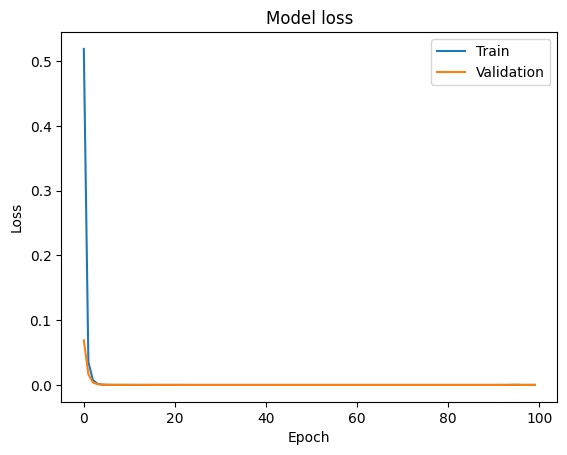

In [58]:
# Part 2: Implementation of NN
import tensorflow as tf
from matplotlib import pyplot as plt


model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(3, activation='relu'),
    tf.keras.layers.Dense(9, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01, ema_momentum=0.001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))


# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


25/25 [==============================] - 0s 2ms/step
R2 Score:  -5.124979058794704
MSE:  273964.06087022723
MAE:  479.21150573432516

R2 Score:  -4.941614536090305
MSE:  283957.5546083279
MAE:  486.4183141833951

MAPE:  1.0012066715285564


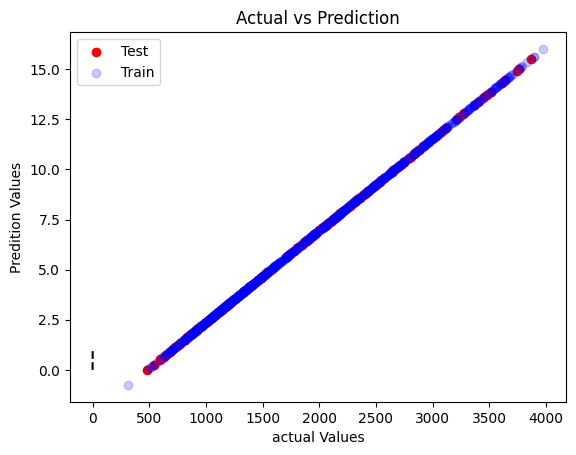

In [64]:
from sklearn.metrics import *
from matplotlib import pyplot as plt


# Part 3: Obtaining predictions
y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)

print("R2 Score: ", r2_score(y_test, y_pred_test))
print("MSE: ", mean_squared_error(y_test, y_pred_test))
print("MAE: ", mean_absolute_error(y_test, y_pred_test))
print("")
print("R2 Score: ", r2_score(y_train, y_pred_train))
print("MSE: ", mean_squared_error(y_train, y_pred_train))
print("MAE: ", mean_absolute_error(y_train, y_pred_train))
print("")
print("MAPE: ", mean_absolute_percentage_error(y_test, y_pred_test))

y_test = scaler.inverse_transform(y_test)
y_pred_test = scaler.inverse_transform(y_pred_test)
y_train = scaler.inverse_transform(y_train)
y_pred_train = scaler.inverse_transform(y_pred_train)

plt.scatter(y_test, y_pred_test, color="red", label="Test")
plt.scatter(y_train, y_pred_train, color="blue", alpha=0.2, label="Train")
plt.xlabel("actual Values")
plt.ylabel("Predition Values")
plt.title("Actual vs Prediction")

x = np.linspace(0,1,30)
plt.plot(x,x,"--",color="black")

plt.legend()
plt.show()
